---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup
    </span>
    <span style="float: right;">
       Machine Learning 2<br>
        <span style="float: right;">SS 2023</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 3</span><br>
     Themen: Regularization, Training Neuronaler Netze<br>
     Abgabetermin: 14.05.2022, 23:59 Uhr<br>
     Punkte: 26
</p>


---

**Namen:** Emelie Hauck, Conrad Christoph

---

In [18]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import time

plt.style.use('ggplot')

## Aufgabe 1 [10 Punkte]

**Daten**<br>
Der Datensatz `auto_vs_ship_train` bzw. `auto_vs_ship_test` enthält farbige Bilder von Schiffen und Autos der Größe 32x32. Die Bilder sind entnommen aus dem CIFAR10 Datensatz.

**Aufgabe**
1. Trainieren Sie das unten angegebene Neuronale Netz, welches die Bilder in Schiffe und Autos klassifizieren soll, mittels SGD für 40 Epochen und Batch-Size 32. Nehmen Sie als Evaluationsmetrik die Cross-Entropy. Visualisieren Sie den Verlauf der Loss-Kurven und interpretieren Sie das Ergebnis. Welches Problem liegt hier vor?
1. Trainieren Sie das Neuronale Netz einmal mit Weight Decay mit geeignetem Parameter. Können Sie dadurch Overfitting verhindern?
1. Fügen Sie an geeigneten Stellen zum Netz aus 1. Dropout hinzu, um so Overfitting zu verhindern.




### Parameter und vordefinierte Funktionen

In [19]:
# Define Parameters
n_epochs = 40

learning_rate = 0.01
log_interval = 20

random_seed = 1
torch.manual_seed(random_seed)

**Daten laden**

In [20]:
train_data_dict = torch.load("Daten Blatt 4/auto_vs_ship_train")
test_data_dict = torch.load("Daten Blatt 4/auto_vs_ship_test")

/var/folders/jd/nf7qsc150dn4fxlf16c4gs140000gn/T/ipykernel_91453/1480075341.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data_dict = torch.load("Daten Blatt 4/a

In [21]:
train_data = train_data_dict["data"]
train_targets = train_data_dict["targets"]
classes = train_data_dict["classes"]

In [22]:
test_data = test_data_dict["data"]
test_targets = test_data_dict["targets"]

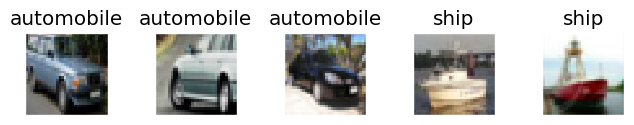

In [23]:
# Plot images
n = 5 # number of images
start_pos = 43
for i in range(n):
  current_img = train_data[i+start_pos] / 2 +0.5 # Re-Normalize
  plt.subplot(1, n, i+1)
  plt.tight_layout()
  plt.imshow(np.transpose(current_img, (1, 2, 0)), interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.title(classes[train_targets[i+start_pos]])
plt.show()

**Neuronales Netz**

In [ ]:
# Definition of the net structure
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.input_size = input_size
        
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

# Definition of the new net structure for dropout
class NetDropout(nn.Module):
    def __init__(self, input_size):
        super(NetDropout, self).__init__()
        self.input_size = input_size
        
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(p=0.8)  #Dropout nach erster Schicht
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(p=0.7)  #Dropout nach zweiter Schicht
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


### Beginn Ihrer Lösung


Epoche 1 [0/1000]	Loss: 0.675721
Epoche 1 [640/1000]	Loss: 0.665570
Epoche 2 [0/1000]	Loss: 0.651903
Epoche 2 [640/1000]	Loss: 0.646401
Epoche 3 [0/1000]	Loss: 0.624201
Epoche 3 [640/1000]	Loss: 0.584905
Epoche 4 [0/1000]	Loss: 0.535208
Epoche 4 [640/1000]	Loss: 0.529189
Epoche 5 [0/1000]	Loss: 0.482088
Epoche 5 [640/1000]	Loss: 0.442403
Epoche 6 [0/1000]	Loss: 0.433585
Epoche 6 [640/1000]	Loss: 0.403811
Epoche 7 [0/1000]	Loss: 0.485463
Epoche 7 [640/1000]	Loss: 0.625309
Epoche 8 [0/1000]	Loss: 0.552179
Epoche 8 [640/1000]	Loss: 0.349398
Epoche 9 [0/1000]	Loss: 0.349946
Epoche 9 [640/1000]	Loss: 0.329349
Epoche 10 [0/1000]	Loss: 0.370793
Epoche 10 [640/1000]	Loss: 0.567288
Epoche 11 [0/1000]	Loss: 0.347251
Epoche 11 [640/1000]	Loss: 0.226644
Epoche 12 [0/1000]	Loss: 0.252762
Epoche 12 [640/1000]	Loss: 0.322770
Epoche 13 [0/1000]	Loss: 0.444636
Epoche 13 [640/1000]	Loss: 0.404546
Epoche 14 [0/1000]	Loss: 0.432971
Epoche 14 [640/1000]	Loss: 0.439441
Epoche 15 [0/1000]	Loss: 0.511690
Epoc

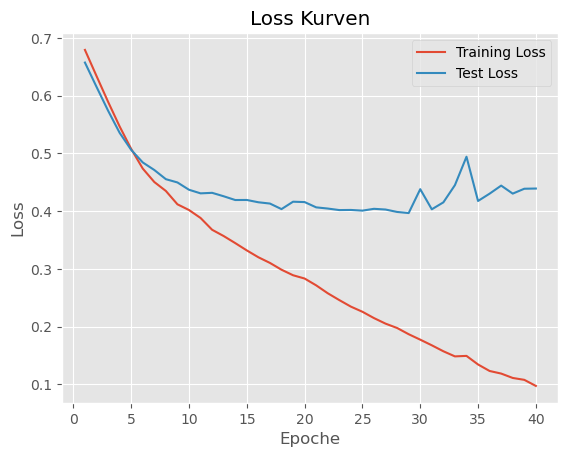

In [29]:
#Aufgabe 1.1:
batch_size = 32
train_loader = torch.utils.data.DataLoader(list(zip(train_data, train_targets)), batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(list(zip(test_data, test_targets)), batch_size=batch_size, shuffle=False)

model = Net(input_size=32*32*3)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.NLLLoss() #Cross-Entropy

#Training and testing loops
train_losses = []
test_losses = []

for epoch in range(1, n_epochs + 1):
    model.train()
    batch_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

        if batch_idx % log_interval == 0:
            print(f"Epoche {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item():.6f}")

    train_losses.append(np.mean(batch_losses))

    #Evaluation auf Test
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

#Plot von Loss Kurven
plt.figure()
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss Kurven')
plt.legend()
plt.show()


Antwort zu 1.1: Hier liegt ein ganz klares Overfitting vor. Die Training-Loss-Kurve sinkt immer weiter über die Epochen hinweg, während der Test Loss nur am Anfang kurz sinkt, danach stagniert und anschließend wieder ansteigt. Dadurch sieht man, dass das Modell sich zu sehr an die Trainingsdaten anpasst und da das Rauschen bzw. den Zufall mitlernt, anstatt generalisierbare Strukturen zu erfassen. 

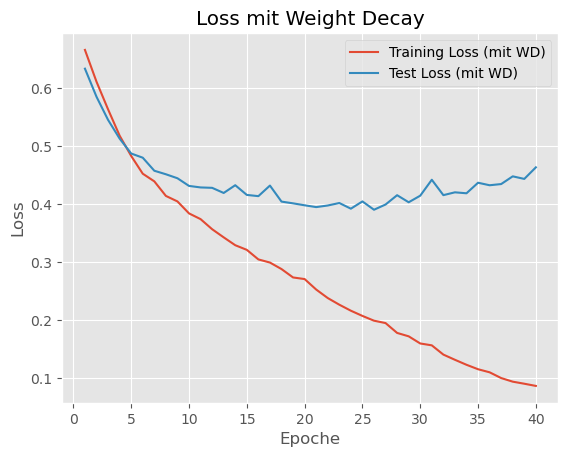

In [33]:
#Aufgabe 1.2:
#Modell neu instanziieren
model_wd = Net(input_size=32*32*3)

optimizer_wd = optim.SGD(model_wd.parameters(), lr=learning_rate, weight_decay=0.001) #Weight Decay
criterion = nn.NLLLoss()

train_losses_wd = []
test_losses_wd = []

for epoch in range(1, n_epochs + 1):
    model_wd.train()
    batch_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer_wd.zero_grad()
        output = model_wd(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_wd.step()
        batch_losses.append(loss.item())

    train_losses_wd.append(np.mean(batch_losses))

    #Test Loss berechnen
    model_wd.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model_wd(data)
            loss = criterion(output, target)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses_wd.append(test_loss)

#Plot von Loss Kurven
plt.figure()
plt.plot(range(1, n_epochs + 1), train_losses_wd, label='Training Loss (mit WD)')
plt.plot(range(1, n_epochs + 1), test_losses_wd, label='Test Loss (mit WD)')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss mit Weight Decay')
plt.legend()
plt.show()


Antwort zu 1.2: Durch den Einsatz von Weight Decay wurde dem Modell ein Strafterm für große Gewichtswerte hinzugefügt. In unserem Fall zeigt sich jedoch so gut wie kein Effekt auf das Overfitting-Problem von vorher: Die Trainings- und Test-Loss-Kurven unterscheiden sich wenn überhaupt nur minimal vom ursprünglichen Verlauf ohne Regularisierung. Dies könnte daran liegen, dass das gewählte Modell relativ einfach ist, wir haben nur 2 Hidden Layer und somit hat das Weight Decay wahrscheinlich zu "wenig zu tun". Bei komplexeren Modellen oder einer längeren Trainingsdauer wäre der regulierende Effekt vermutlich deutlicher sichtbar.

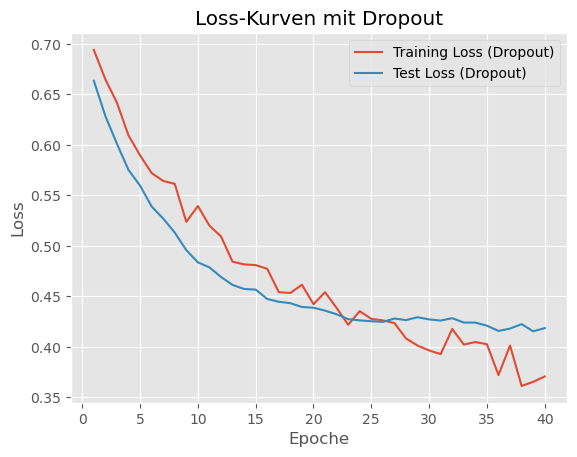

In [34]:
#Aufgabe 1.3:

#Neues Modell mit Dropout
model_dropout = NetDropout(input_size=32*32*3)

optimizer_dropout = optim.SGD(model_dropout.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()

train_losses_do = []
test_losses_do = []

for epoch in range(1, n_epochs + 1):
    model_dropout.train()
    batch_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer_dropout.zero_grad()
        output = model_dropout(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_dropout.step()
        batch_losses.append(loss.item())

    train_losses_do.append(np.mean(batch_losses))

    model_dropout.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model_dropout(data)
            loss = criterion(output, target)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses_do.append(test_loss)

plt.figure()
plt.plot(range(1, n_epochs + 1), train_losses_do, label='Training Loss (Dropout)')
plt.plot(range(1, n_epochs + 1), test_losses_do, label='Test Loss (Dropout)')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss-Kurven mit Dropout')
plt.legend()
plt.show()


Antwort zu 1.3: Durch den Einsatz von Dropout konnte das Overfitting verhindert werden. Die Test-Loss-Kurve verläuft über die gesamten 40 Epochen stabil und steigt nicht wie in den ursprünglichen Varianten an. Auffällig ist, dass der Test-Loss teilweise unter dem Trainings-Loss liegt – das könnte man auf einen Dropout-Mechanismus zurückführen, da beim Testen keine Neuronen deaktiviert werden und das Modell somit seine volle Kapazität nutzen kann.

## Aufgabe 2 [16 Punkte]

**Daten**<br>
Der Datensatz _Covertype_ aus dem UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Covertype bzw. https://github.com/jeffheaton/data/blob/master/covtype.csv) enthält unterschiedliche Attribute zur Beschaffenheit von Wäldern und eine Zielvariable `Cover_Type`, welche die Waldbezeichnung beschreibt. Mehr Informationen finden Sie in dem obigen Link.

**Aufgabe**<br>
Nutzen Sie alle Ihnen aus der Vorlesung bekannten Werkzeuge (z.B. Weight Initialization, Dropout, Batch Normalization, Adam, Momentum, ...), um ein Neuronales Netz zu trainieren, welches möglichst gut die Wälder nach Ihrer Cover_Type klassifiziert. Welchen Wert der Cross-Entropy und der Accuracy hat Ihr Neuronales Netz auf den Testdaten? Sie sollten auf den Testdaten eine Cross-Entropy unter 0.25 bzw. eine Accuracy von mind. 90% erreichen.

_Hinweis:_ Sie können in den Skripten zur Vorlesung auf Moodle nachsehen, wie man die einzelnen Verfahren implementiert werden.

### Beginn Ihrer Lösung


In [26]:
...

Ellipsis